## Simple Linear Regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm # Utilizado para visualizar o "R² Ajustado"

In [3]:
base = pd.read_csv('../datasets/mt_cars.csv')
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Correlation between Consumption and Cylinders

In [4]:
X = base.iloc[:, 2].values # disp (cylinders)
y = base.iloc[:, 0].values # mpg (consumption per gallon)

In [7]:
correlation = np.corrcoef(X, y)
print(correlation)

[[ 1.         -0.84755138]
 [-0.84755138  1.        ]]


### Linear Regression Model

In [9]:
X = X.reshape(-1, 1) # Transformação necessária para utilizar o 'X' no 'modelo'.

model = LinearRegression()
model.fit(X, y) # ?model.fit # Treinamento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
model.coef_ # Inclination

array([-0.04121512])

In [68]:
model.intercept_ # Intersection

29.59985475616395

### Determination Coefficient (R²)

In [13]:
# R² - Indica o quanto as variáveis (X) indepedentes explicam a variável (y) dependente (resposta)

In [26]:
model.score(X, y) # R²

0.7183433404897299

In [27]:
adjusted_model = sm.ols(formula = 'mpg ~ disp', data = base)
trained_model = adjusted_model.fit()
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           9.38e-10
Time:                        11:22:05   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

In [28]:
predictions = model.predict(X)

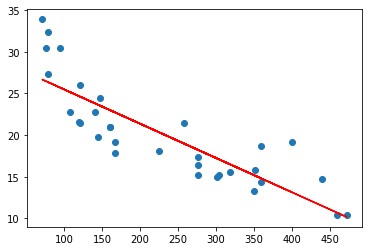

In [30]:
plt.scatter(X, y)
plt.plot(X, predictions, color = 'red')

In [33]:
X_predict = np.array(200).reshape(-1, 1)
model.predict(X_predict)

array([21.35683076])

## Multiple Linear Regression

In [36]:
X1 = base.iloc[:, 1:4].values # cyl, disp, hp
y1 = base.iloc[:, 0].values # mpg

### Linear Regression Model

In [40]:
model1 = LinearRegression()
model1.fit(X1, y1) # Treinamento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Determination Coefficient (R²)

In [44]:
model1.score(X1, y1)

0.7678877440928638

In [47]:
adjusted_model1 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base)
trained_model1 = adjusted_model1.fit()
trained_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           5.05e-09
Time:                        11:39:12   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction

In [65]:
prediction1 = np.array([4, 200, 100]) # cyl, disp, hp
prediction1 = prediction1.reshape(1, -1)

In [66]:
model1.predict(prediction1)

array([24.03968887])